In [110]:
# 1번 문제
# 업체명을 기준으로 RFM분석 실시
import pandas as pd

In [2]:
df = pd.read_excel("미니프로젝트-쇼핑몰 실습데이터.xlsx")
# thousands=',' -> 자리수 구분자를 읽는 방법 or replace로 대체

In [5]:
df['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', nan, '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', '-', ' + 포'], dtype=object)

## 전처리
- 자의적인 판단 많이 들어감
- 왠만하면 놔두는 타입 (강사님)

In [7]:
df['주문번호'].unique()

array([191213170236874, 191216100347429, 191216173241622, ...,
       221108104536307, 221108104735216, 221108105148171], dtype=int64)

In [8]:
df['업체명'].unique()
# 사실관계 확인후 이름 수정, 그러나 지금은 하지x

array(['지니', '쥬크박스', '조이스', '라온웍스', '네오필립', '산스토어', '셀러테스트', '유앤알코리아',
       '거영아이앤디', '레인트리', '가이스파트너스', '빅픽처', '에이스디포', '로렌츄컴퍼니', '피플이엔티',
       '비즈마켓렌탈', '플레이피에스마케팅', '퍼스트엔터테인먼트', '스테툴스', '와이앤제이', '한민유통',
       '블루스톤익스체인지', '아이엔리테일', '드림빌', '럭스럭스', '애쓰다', '라씨오날에듀', '가베',
       '이든교육', '엘식스', '에스아이상사', '사이언스스타', '피에이엔글로벌', '이선생자석교구', '뮤템',
       '페트라기업', '와니사이언스', '준디자인', '청화', '더싸다닷컴', '오피스퀵', '행복한바오밥', '보드엠',
       '트리인천신현지사', '리틀램스쿨', '그린피앤에스', nan, '다우기술', '채널씨엔씨', '디자인다소',
       '아토코리아', '지니 태블릿', '유쾌한생각', '엔에이치엔에듀', '래시드', '이트너스', '싱크로드코리아',
       '스낵포', '모든오피스', '마스크공작소', '프린피아', '뉴트리원', '알파', '로즈마켓', '천재태블릿',
       '일이테크', '비전플레이스', '주식회사 티앤티솔루션', '티셀-유아', '테스트', '지니 태블릿(후불집행)',
       '애플나라샵', '티셀-도서', '헬스하우스', '에어인', '리얼리티리테일코리아', '석빙고', '만들기대장',
       '링커블테크놀러지', '매직북스', '플레이스마터', '인테이크 주식회사', '리체', '오피스허브', '메디쿼터스',
       '바나나코퍼레이션', '맨도롱', '7321디자인', '이루커머스', '한샘글로벌'], dtype=object)

In [9]:
df['상품명'].unique()
# ''[학생선물] 동물 메모리 게임' 과 '동물 메모리 게임' 은 다른것인가?
# [학생선물] 요롷게 표시되어있는게 있는거랑 없는거랑 같다고 가정

array(['eHBM셀파수학교실 비닐봉투-1세트 100장입', 'eHBM셀파수학교실 삼색볼펜-1세트 50개입',
       'eHBM셀파수학교실 회원용 리플렛-1세트 50권입', ..., '[학생선물] 깜짝 주사위게임',
       '[학생선물] 동물 메모리 게임', '[학생선물] 크리스마스 무릎담요 (랜덤발송)'], dtype=object)

In [13]:
df['상품명'] = df['상품명'].apply(lambda x: str(x).split('] ')[-1])

In [14]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [15]:
df['제조사'].unique()

array(['HB', '쥬크박스', '자바펜', ..., '(주)비알코리아', '중국', '레전드코퍼레이션'],
      dtype=object)

In [16]:
df['판매금액'].unique()
# int형식이므로 전부다 정수
# nan 값은 없다 (float형식이 아니기에)
# min, max 적당하니 건드리지 말자

array([  5000,  67500,  30000, ..., 712500,  19380, 161500], dtype=int64)

### 번외

In [17]:
# 만약 판매금액 칼럼에서 , 표기가 그래도 있어서 object 형식으로 뜰때
# 데이터 불러올때 thousands=',' -> 자리수 구분자를 읽는 방법 or replace로 대체

## 전처리 again

In [18]:
df['처리상태'].unique()

array(['구매확정', '주문취소', '미결제', '후불반려', '환불완료', '환불승인', '부분환불', '부분취소',
       '상담취소', '교환완료', '상담형상품접수', '환불요청', '배송완료', '배송준비', '배송중', '시안확인요청',
       '결제완료'], dtype=object)

In [19]:
df['처리상태_bin'] = df['처리상태'] == '구매확정'

In [21]:
df['할부기간'].unique()
# nan, 1개월 = 일시불로 처리

array([nan, '12개월', '1개월', '24개월', '6개월', '18개월'], dtype=object)

In [27]:
df['할부기간'] = df['할부기간'].fillna('1개월')
# nan값은 서로 일치하지 않기때문에 1개월로 변경 후 처리

In [28]:
df['할부기간'] = df['할부기간'].apply(lambda x: '일시불' if x =='1개월' else x)

In [29]:
df['할부기간'].unique()

array(['일시불', '12개월', '24개월', '6개월', '18개월'], dtype=object)

In [30]:
# 할부기간 숫자로 바꾸기

In [32]:
df['할부기간'] = df['할부기간'].apply(lambda x: '1개월' if x =='일시불' else x)

In [33]:
df['할부기간'].unique()

array(['1개월', '12개월', '24개월', '6개월', '18개월'], dtype=object)

In [34]:
df['할부기간'] = df['할부기간'].apply(lambda x: int(x.replace('개월','')))

In [35]:
df['할부기간'].unique()

array([ 1, 12, 24,  6, 18], dtype=int64)

In [31]:
# 결제방법 전처리
df['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', nan, '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', '-', ' + 포'], dtype=object)

In [36]:
# nan값을 - 으로 처리

In [37]:
df['결제방법'] = df['결제방법'].fillna('-')

In [40]:
# 머리글자만 표기
df['결제방법'] = df['결제방법'].apply(lambda x: '-' if x[0] == ' ' else x[0])

In [41]:
df['결제방법'].unique()

array(['신', '가', '후', '무', '-', '포', '적', '웰', '정', '현'], dtype=object)

In [42]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,처리상태_bin
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신,2019-12-13 17:03:37,구매확정,N,NaN,1,True
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신,2019-12-16 10:04:50,구매확정,N,NaN,1,True
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신,2019-12-16 10:04:50,구매확정,N,NaN,1,True
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신,2019-12-16 17:33:43,구매확정,N,NaN,1,True
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신,2019-12-16 17:33:43,구매확정,N,NaN,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,입체 액자형 현판,에이스디포,1,35000,웰,2022-11-08 10:38:21,결제완료,Y,NaN,1,False
218597,221108104041264,에이스디포,아크릴 사인,HB,1,26900,웰,2022-11-08 10:38:21,결제완료,Y,NaN,1,False
218598,221108104536307,에이스디포,아크릴 사인,HB,1,26900,신,2022-11-08 10:43:15,배송준비,N,NaN,1,False
218599,221108104735216,다우기술,아이스 카페 아메리카노 T,스타벅스,1,4050,포,2022-11-08 10:45:14,배송완료,N,NaN,1,False


In [44]:
df['주문일자'][0]

Timestamp('2019-12-13 17:03:37')

In [47]:
pd.Timestamp('2023-01-01 05:00:00') - pd.Timestamp('2019-01-01 05:00:00')

Timedelta('1461 days 00:00:00')

In [49]:
# F : count 하는겨
# M : 얼마나 많이?
df.sort_values('주문일자', ascending=False)

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,처리상태_bin
218600,221108105148171,다우기술,2차-신세계 상품권 모바일 교환권-1만원권,신세계,17,161500,신,2022-11-08 10:49:28,배송완료,N,NaN,1,False
218599,221108104735216,다우기술,아이스 카페 아메리카노 T,스타벅스,1,4050,포,2022-11-08 10:45:14,배송완료,N,NaN,1,False
218598,221108104536307,에이스디포,아크릴 사인,HB,1,26900,신,2022-11-08 10:43:15,배송준비,N,NaN,1,False
218597,221108104041264,에이스디포,아크릴 사인,HB,1,26900,웰,2022-11-08 10:38:21,결제완료,Y,NaN,1,False
218596,221108104041264,에이스디포,입체 액자형 현판,에이스디포,1,35000,웰,2022-11-08 10:38:21,결제완료,Y,NaN,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,191216173241622,지니,eHBM셀파수학교실-연필(빨강)_1세트 50개입,HB,1,6000,신,2019-12-16 17:33:43,구매확정,N,NaN,1,True
7,191216173241622,지니,eHBM셀파수학교실-물티슈_1세트 100개입,HB,1,20000,신,2019-12-16 17:33:43,구매확정,N,NaN,1,True
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신,2019-12-16 10:04:50,구매확정,N,NaN,1,True
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신,2019-12-16 10:04:50,구매확정,N,NaN,1,True


In [51]:
# 얼마나 자주?
df['업체명'].value_counts()

다우기술        85553
지니          61835
쥬크박스        18661
에이스디포        8388
오피스퀵         7173
            ...  
리체              4
프린피아            4
링커블테크놀러지        3
한샘글로벌           3
에어인             1
Name: 업체명, Length: 89, dtype: int64

In [52]:
# 얼마나 많이?
df.groupby('업체명').sum().sort_values('판매금액',ascending=False)

C:\Users\leah5\AppData\Local\Temp\ipykernel_8812\3082033300.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('업체명').sum().sort_values('판매금액',ascending=False)


,주문번호,주문수량,판매금액,할부기간,처리상태_bin
업체명,,,,,
다우기술,113306969066849808,231561,3687810416,85553,65981
천재태블릿,631096814603114872,5967,2362932000,8993,1772
지니 태블릿,311859783704791805,3714,1455928000,11202,1155
지니,-5433315132845871932,173369,1241881825,61835,44562
지니 태블릿(후불집행),285890286193804950,2732,1081872000,1297,1209
...,...,...,...,...,...
한샘글로벌,663305405175798,7,93400,3,0
이선생자석교구,1607610728585356,8,86700,8,6
리체,884144556390321,4,78900,4,2


In [53]:
# 최종 순위는 각각 결과에 가중치를 주어서 스코어링을 하는 방법이 있음.
# 여기서는 넘어간다. 
# 최종 결과는 1위 다우기술, 2위 어쩌구.... 

## 문제 2번

In [57]:
df['주문일자'][0].month

12

In [58]:
df['주문일자'][0]

Timestamp('2019-12-13 17:03:37')

In [62]:
year = df['주문일자'].apply(lambda x: x.year)

In [74]:
month = df['주문일자'].apply(lambda x: x.month)

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp

plt.rc('font', family='Malgun Gothic')
mlp.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='주문일자', ylabel='판매금액'>

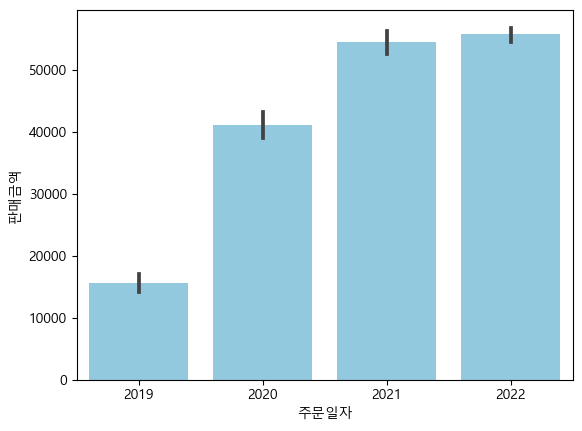

In [72]:
sns.barplot(x=year, y=df['판매금액'], color='skyblue')

<Axes: xlabel='주문일자', ylabel='판매금액'>

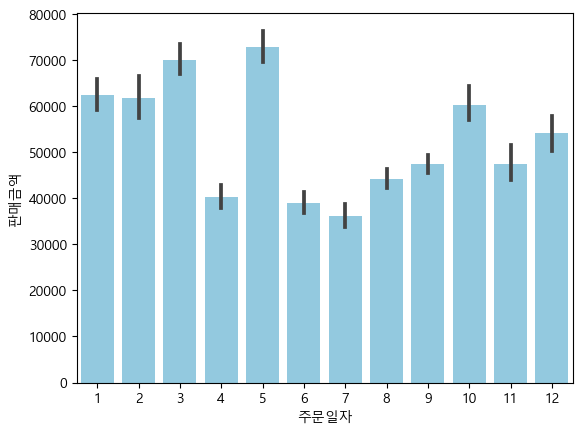

In [75]:
sns.barplot(x=month, y=df['판매금액'], color='skyblue')
# 신학기 시즌에는 매출이 많고 5월은 어린이날,9월 10월 시즌 가을학기 시즌에는 수요가 별로 없다.
# 학기중에는 매출이 크지 않다. 12월에도 크리스마스 시즌으로 약간의 매출이 오르지만 새해시즌만큼은 매출이
# 오르지 않는 경향을 보이고 있다.

### 2-b

In [80]:
df2 = df[df['처리상태_bin']]

In [84]:
df2['월'] = df2['주문일자'].apply(lambda x: x.month)

C:\Users\leah5\AppData\Local\Temp\ipykernel_8812\4052857821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['월'] = df2['주문일자'].apply(lambda x: x.month)


In [86]:
df3 = df2[df2['할부기간'] == 1] # 할부기간이 일시불인 데이터

In [89]:
df4 = df3.groupby('월').sum()['판매금액']
# 일시불 판매금액

C:\Users\leah5\AppData\Local\Temp\ipykernel_8812\3785316271.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4 = df3.groupby('월').sum()['판매금액']


In [92]:
df5 = df2[df2['할부기간'] != 1] # 일시불 제외 데이터

In [112]:
df4

월
1      616908300
2      782402825
3      977181885
4      626110808
5     1056928970
6      552251235
7      514327990
8      729582760
9      711362140
10     655030703
11     454936874
12     487545348
Name: 판매금액, dtype: int64

In [97]:
df5['할부기간']

25732     12
25738     12
25739     12
25774     24
25775     24
          ..
211390    18
212433    18
212630    12
213502    12
213509    12
Name: 할부기간, Length: 1190, dtype: int64

In [101]:
df5.index

Int64Index([ 25732,  25738,  25739,  25774,  25775,  25776,  25777,  25866,
             25867,  25868,
            ...
            207456, 209717, 209816, 209977, 210957, 211390, 212433, 212630,
            213502, 213509],
           dtype='int64', length=1190)

In [102]:
df5.loc[25732,['할부기간','판매금액', '월']]

할부기간        12
판매금액    768000
월           10
Name: 25732, dtype: object

In [99]:
for i in df5.index:
    temp = df5.loc[i,['할부기간','판매금액', '월']]
    month = temp['월']
    
    for j in range(1, temp['할부기간']+1):
        k = month + j
        
        if k > 12:
            k = month + j - 12
            
            if k > 12:
                k -= 12
                
        df4.loc[k] += temp['판매금액'] / temp['할부기간']

In [100]:
df4

월
1      616908300
2      782402825
3      977181885
4      626110808
5     1056928970
6      552251235
7      514327990
8      729582760
9      711362140
10     655030703
11     454936874
12     487545348
Name: 판매금액, dtype: int64

## 문제 3번

In [104]:
# 각 분류별로 ttest를 하던지
# anova를 하던지 등등
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,처리상태_bin
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신,2019-12-13 17:03:37,구매확정,N,NaN,1,True
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신,2019-12-16 10:04:50,구매확정,N,NaN,1,True
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신,2019-12-16 10:04:50,구매확정,N,NaN,1,True
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신,2019-12-16 17:33:43,구매확정,N,NaN,1,True
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신,2019-12-16 17:33:43,구매확정,N,NaN,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,입체 액자형 현판,에이스디포,1,35000,웰,2022-11-08 10:38:21,결제완료,Y,NaN,1,False
218597,221108104041264,에이스디포,아크릴 사인,HB,1,26900,웰,2022-11-08 10:38:21,결제완료,Y,NaN,1,False
218598,221108104536307,에이스디포,아크릴 사인,HB,1,26900,신,2022-11-08 10:43:15,배송준비,N,NaN,1,False
218599,221108104735216,다우기술,아이스 카페 아메리카노 T,스타벅스,1,4050,포,2022-11-08 10:45:14,배송완료,N,NaN,1,False


In [106]:
from statannot import add_stat_annotation
# 상관관계분석은 결제방법은 안되므로 t-test로 함./ 숫자-숫자끼리만 사용

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

신 v.s. 가: t-test independent samples with Bonferroni correction, P_val=9.191e-01 stat=-1.015e-01


(<Axes: xlabel='결제방법', ylabel='판매금액'>,
 [<statannot.StatResult.StatResult at 0x25d3cc87910>])

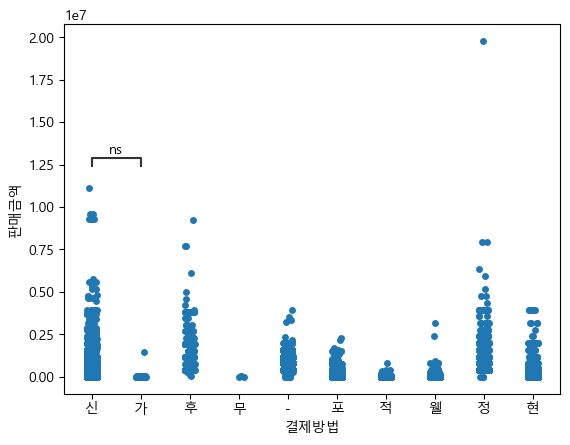

In [108]:
fig = sns.stripplot(data=df, x='결제방법', y='판매금액')
add_stat_annotation(ax=fig, data=df, x='결제방법', y='판매금액',
                   box_pairs=[(('신','가'))],
                   test='t-test_ind')
#  포인트, 적립금, 웰컴포인트는 현행법상 200만원 이상 보유x 이므로 제한이 있음
# 그래프를 보면 분포적으로 차이가 있어보이지는 않음
# 해당 가설이 귀각될 확률이 90퍼센트다. 즉 대립가설이 90퍼센트 이상 틀렸다.
# p-value = 두 그룹이 다르다는 걸 귀각할 확률
# 결론: 시각상으로 가장 차이가 많이나는 것 두개의 ttest결과가 서로 분포가 차이가 없다는 것이므로 '결제방법'과 '판매금액' 사이에는 차이가 없다고 판단.

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

신 v.s. 가: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.015e-01
가 v.s. 후: t-test independent samples with Bonferroni correction, P_val=1.428e-12 stat=-7.420e+00


(<Axes: xlabel='결제방법', ylabel='판매금액'>,
  <statannot.StatResult.StatResult at 0x25d41628070>])

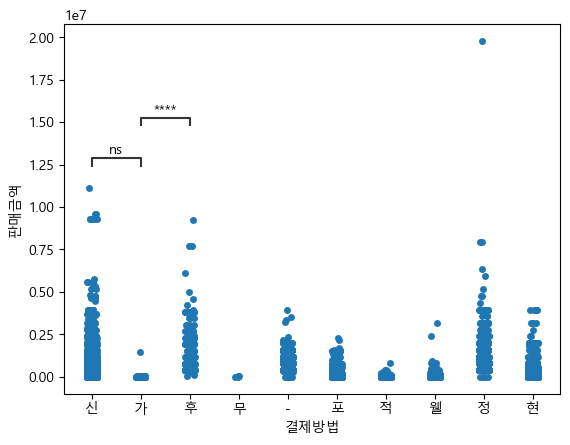

In [109]:
fig = sns.stripplot(data=df, x='결제방법', y='판매금액')
add_stat_annotation(ax=fig, data=df, x='결제방법', y='판매금액',
                   box_pairs=[(('신','가')),(('가','후'))],
                   test='t-test_ind')

# 샘플차이가 남에 따라 p-value 결과가 다를 수 있음.
# 그렇다고 해서 이 전체 그룹이 서로 차이가 있다고 말할 수 는 없음.
# 가 - 후 해석: 후불 결제와 가상계좌로 결제한 것은 차이가 있다고 볼 수 있다. 후불 결제보다 가상계좌로의 수단이 더 판매금액이 적게 나오므로 후불로 결제하도록 유도한다.
